<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [21]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [7]:
# Read CSV
house_csv = r"D:\Download\DataScience\Files\Week250923_MachineLearning\Module4\Sacramento_transactions.csv"

In [8]:
df=pd.read_csv(house_csv)
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [9]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [10]:
df.shape

(985, 12)

In [11]:
#There seems to be no null value, but from the describe() there seems to be 0 sq__ft houses
zero = df[df['sq__ft'] == 0]
print(zero)

                       street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
966          9197 CORTINA CIR        ROSEVILLE  95678    CA     3      2   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   
973      2181 WINTERHAVEN CIR     CAMERON PARK  95682    CA     3      2   

     sq__ft         type                     sale_date   price   latitude  \
73        

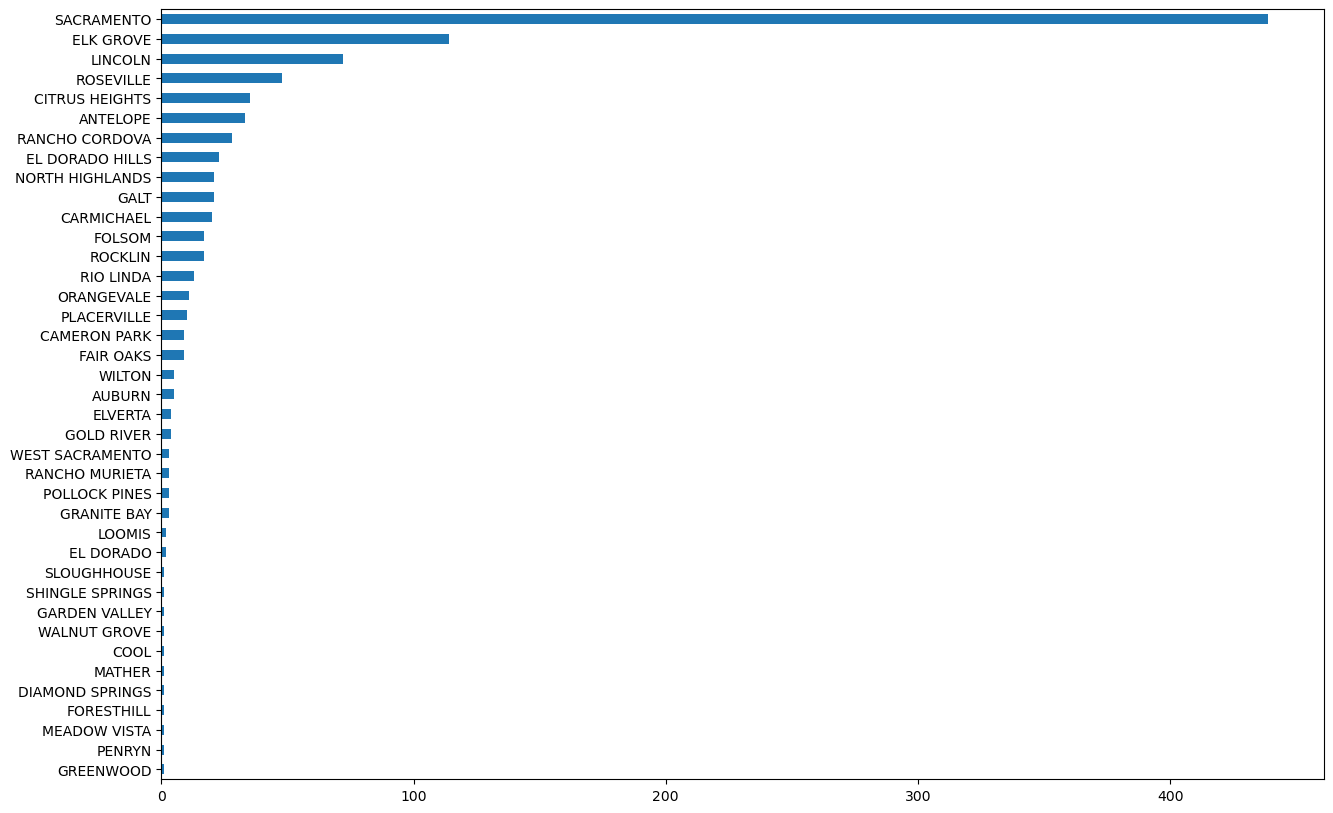

In [14]:
df['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [17]:
# ANSWER
# The target variable is price because that is the variable we are trying to predict

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [18]:
# ANSWER
df.corr()

C:\Users\GGPC\AppData\Local\Temp\ipykernel_9000\1579267476.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


Based on the correlation matrix, the best predictor would be:
- sq_ft
- beds
- baths

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

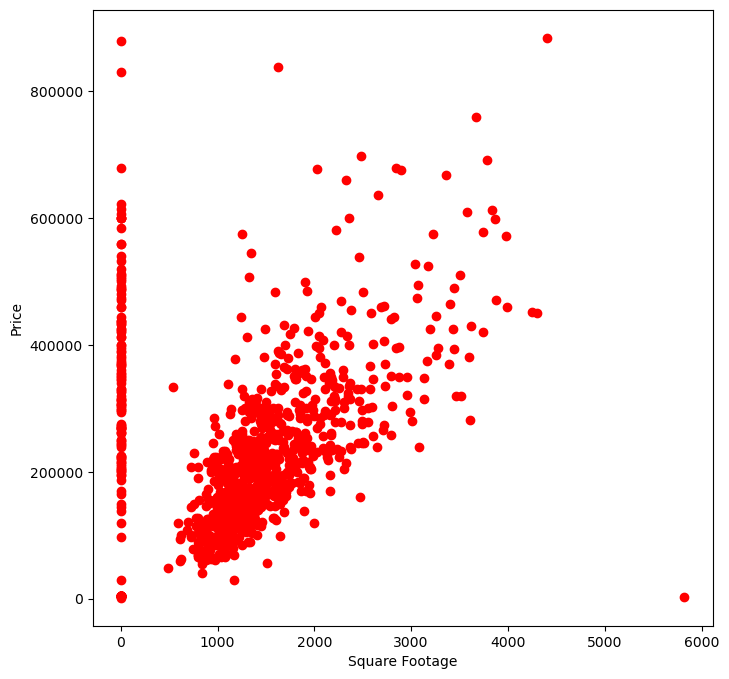

In [25]:
# ANSWER
plt.figure(figsize=(8,8))
plt.scatter(df['sq__ft'], df['price'], color='red')
plt.xlabel("Square Footage")
plt.ylabel("Price");

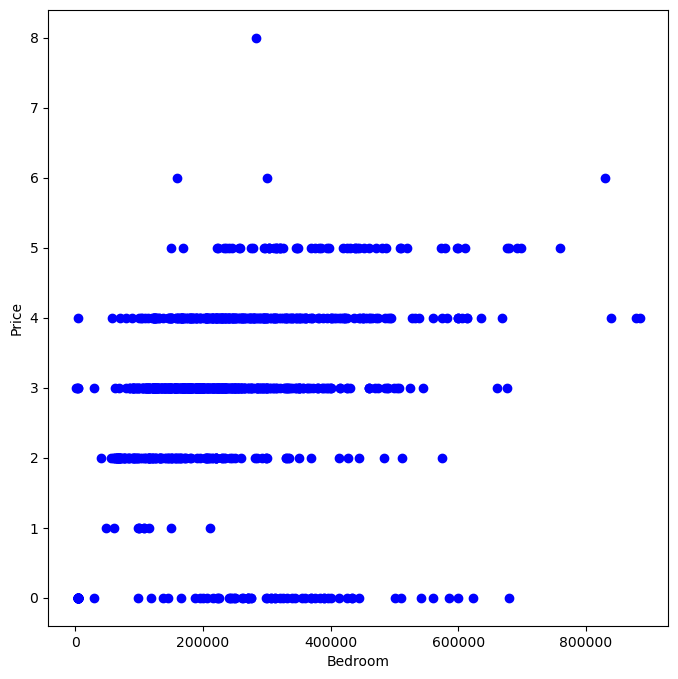

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(df['price'], df['beds'], color='blue')
plt.xlabel("Bedroom")
plt.ylabel("Price");

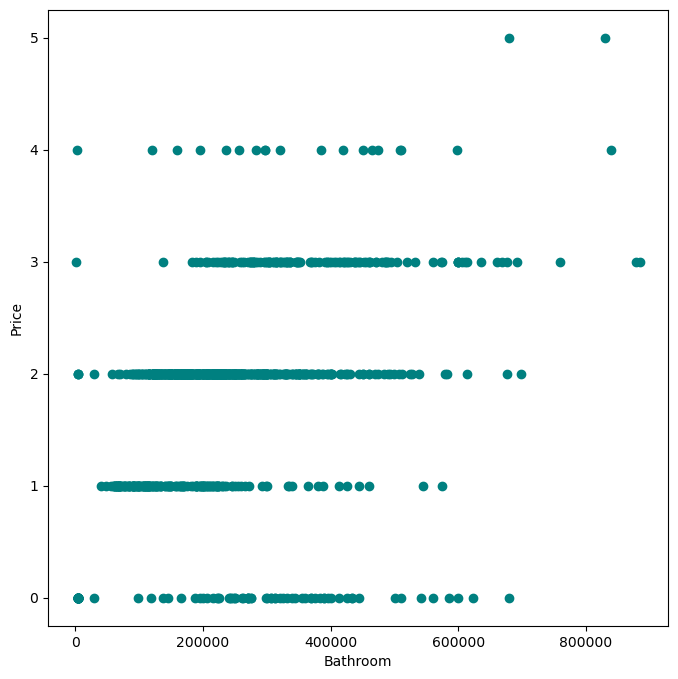

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(df['price'], df['baths'], color='teal')
plt.xlabel("Bathroom")
plt.ylabel("Price");

Although the other variable may have slightly higher correlation value, visually we can see from the three graphs above, the square footage vs price has more obvious shape indicating linear relation

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [29]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [33]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
y = df['price']

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [36]:
# ANSWER
model = LinearRegression()
model.fit(X,y)

R2 = model.score(X,y)
R2

0.11148717682951459

### 3. Splitting Data

In [37]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [38]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [48]:
# ANSWER
## Check training/test data
data_dict = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test
}

def printCheck(data_name, data):
    print(f'shape of {data_name} is {data.shape}')
    print(data[:5])
    
for data_name, data in data_dict.items():
    printCheck(data_name, data)

shape of X_train is (788, 1)
[[1882]
 [2280]
 [1624]
 [1462]
 [1939]]
shape of X_test is (197, 1)
[[ 906]
 [2382]
 [1962]
 [1739]
 [1527]]
shape of y_train is (788,)
963    219000
762    279000
334    839000
889    121500
529    423000
Name: price, dtype: int64
shape of y_test is (197,)
613     77000
451    236000
731    240971
436    221000
275    293993
Name: price, dtype: int64


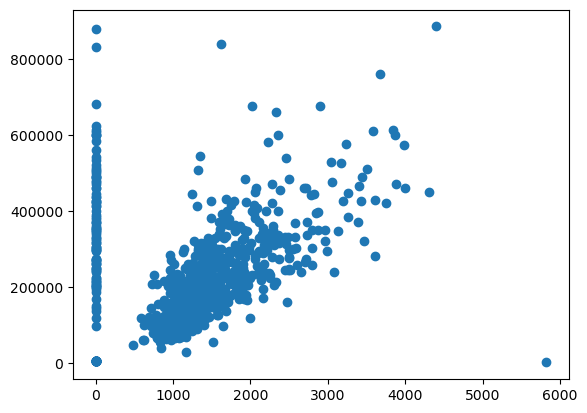

In [51]:
plt.scatter(X_train, y_train)

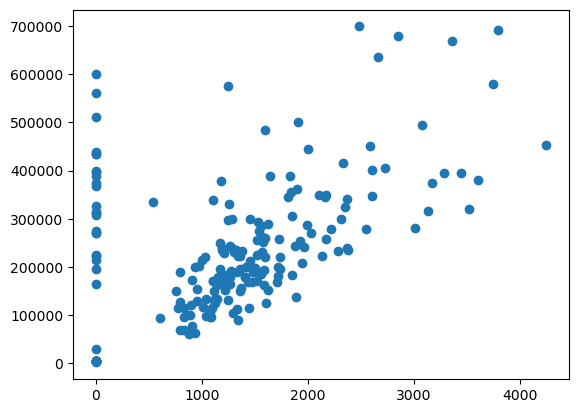

In [52]:
plt.scatter(X_test, y_test)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [56]:
# ANSWER
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.08748241975813609

In [57]:
# ANSWER
model.score(X_test, y_test)

0.19174123389849995

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [58]:
# ANSWER
model.predict(np.array([[1204]]))

array([227730.50204809])

#### Find the error

In [60]:
# Predict price from X_test
model.predict(X_test)

array([213343.85924209, 284601.19072416, 264324.71428618, 253558.8708441 ,
       243324.0779754 , 169604.60292586, 169604.60292586, 261331.52014533,
       169604.60292586, 169604.60292586, 221840.66841611, 169604.60292586,
       224640.75325754, 169604.60292586, 223095.87886227, 246172.44014169,
       207985.07618348, 208033.35350834, 169604.60292586, 314871.07340659,
       257952.10740567, 235358.31937477, 282283.87913125, 230675.41886409,
       226282.18230252, 248006.97848608, 263262.61313942, 222709.66026345,
       246655.21339022, 258338.32600448, 230868.5281635 , 258965.93122756,
       242261.97682865, 243082.69135114, 169604.60292586, 226282.18230252,
       209964.44650243, 246896.60001448, 219764.74344746, 169604.60292586,
       267607.57237614, 199053.7710858 , 169604.60292586, 280980.39136024,
       258965.93122756, 248200.08778549, 237675.63096768, 292711.78129936,
       231592.68803628, 374590.12424894, 239944.66523574, 229854.7043416 ,
       244096.51517304, 2



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



